<a href="https://colab.research.google.com/github/mrMichalR/Classification/blob/main/Employ_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## for data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
#import statsmodels.formula.api as smf
#import statsmodels.api as sm## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition## for explainer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

from pandas.api.types import CategoricalDtype
from plotnine import *

In [ ]:
ddf1 = pd.read_csv('df1.csv')
ddf1.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,2.724882,6468.496067,14276.196898,2.681726
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,1.107453,4682.905422,7149.079135,2.487077
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2899.000000,7973.000000,1.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14218.000000,2.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8346.000000,20471.000000,4.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000


In [ ]:
ddf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeNumber           4449 non-null   int64  
 1   Age                      4449 non-null   float64
 2   BusinessTravel           4449 non-null   object 
 3   DailyRate                4449 non-null   float64
 4   Department               4449 non-null   object 
 5   DistanceFromHome         4449 non-null   float64
 6   Education                4449 non-null   float64
 7   EducationField           4449 non-null   object 
 8   EmployeeCount            4449 non-null   float64
 9   EnvironmentSatisfaction  4449 non-null   float64
 10  Gender                   4449 non-null   object 
 11  HourlyRate               4449 non-null   float64
 12  JobInvolvement           4449 non-null   float64
 13  JobLevel                 4449 non-null   float64
 14  JobRole                 

In [ ]:
ddf2 = pd.read_csv('df2.csv')
ddf2.describe()

,EmployeeNumber,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,15.187683,3.148573,2.725556,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,3.642842,0.355707,1.080807,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [ ]:
ddf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

In [ ]:
ddf1['Age'].value_counts()

35.0      223
34.0      223
29.0      194
36.0      191
31.0      190
         ... 
3871.0      1
1126.0      1
5582.0      1
2637.0      1
8703.0      1
Name: Age, Length: 179, dtype: int64

In [ ]:
# ddf1.merge(ddf2, left_on='lkey', right_on='rkey')
ddf3 = ddf1.join(ddf2, lsuffix='_caller', rsuffix='_other')

In [ ]:
ddf3

,EmployeeNumber_caller,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [ ]:
ddf3.isnull().any()

EmployeeNumber_caller       False
Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
EmployeeNumber_other        False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [ ]:
ddf3.nunique()

EmployeeNumber_caller       4449
Age                          179
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome             158
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
EmployeeNumber_other        4449
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears            172
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
ddf3.isnull().sum()

EmployeeNumber_caller         0
Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
EmployeeNumber_other          0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
ddf3.describe()

,EmployeeNumber_caller,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,...,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,...,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,...,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [ ]:
ddf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber_caller     4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EmployeeCount             4449 non-null   float64
 9   EnvironmentSatisfaction   4449 non-null   float64
 10  Gender                    4449 non-null   object 
 11  HourlyRate                4449 non-null   float64
 12  JobInvolvement            4449 non-null   float64
 13  JobLevel                  4449 non-null   float64
 14  JobRole 

Rada od Piotra = sprawdzić które kolumny mają wartości absurdalne. Czy tylko ta kolumna jest absurdalna a reszta danych jest OK. Jeśli tak to warto zatrzymać te dane. Wtedy wartości absurdalne (np. Age= 1100 lub 9000) zastąpić Na, następnie potem liczyć średnią lub mediane i zastąpić NaN. 
* W tym przypadku DistanceFromHome wartości aburdalne stanowią 7% więc można je odrzucić

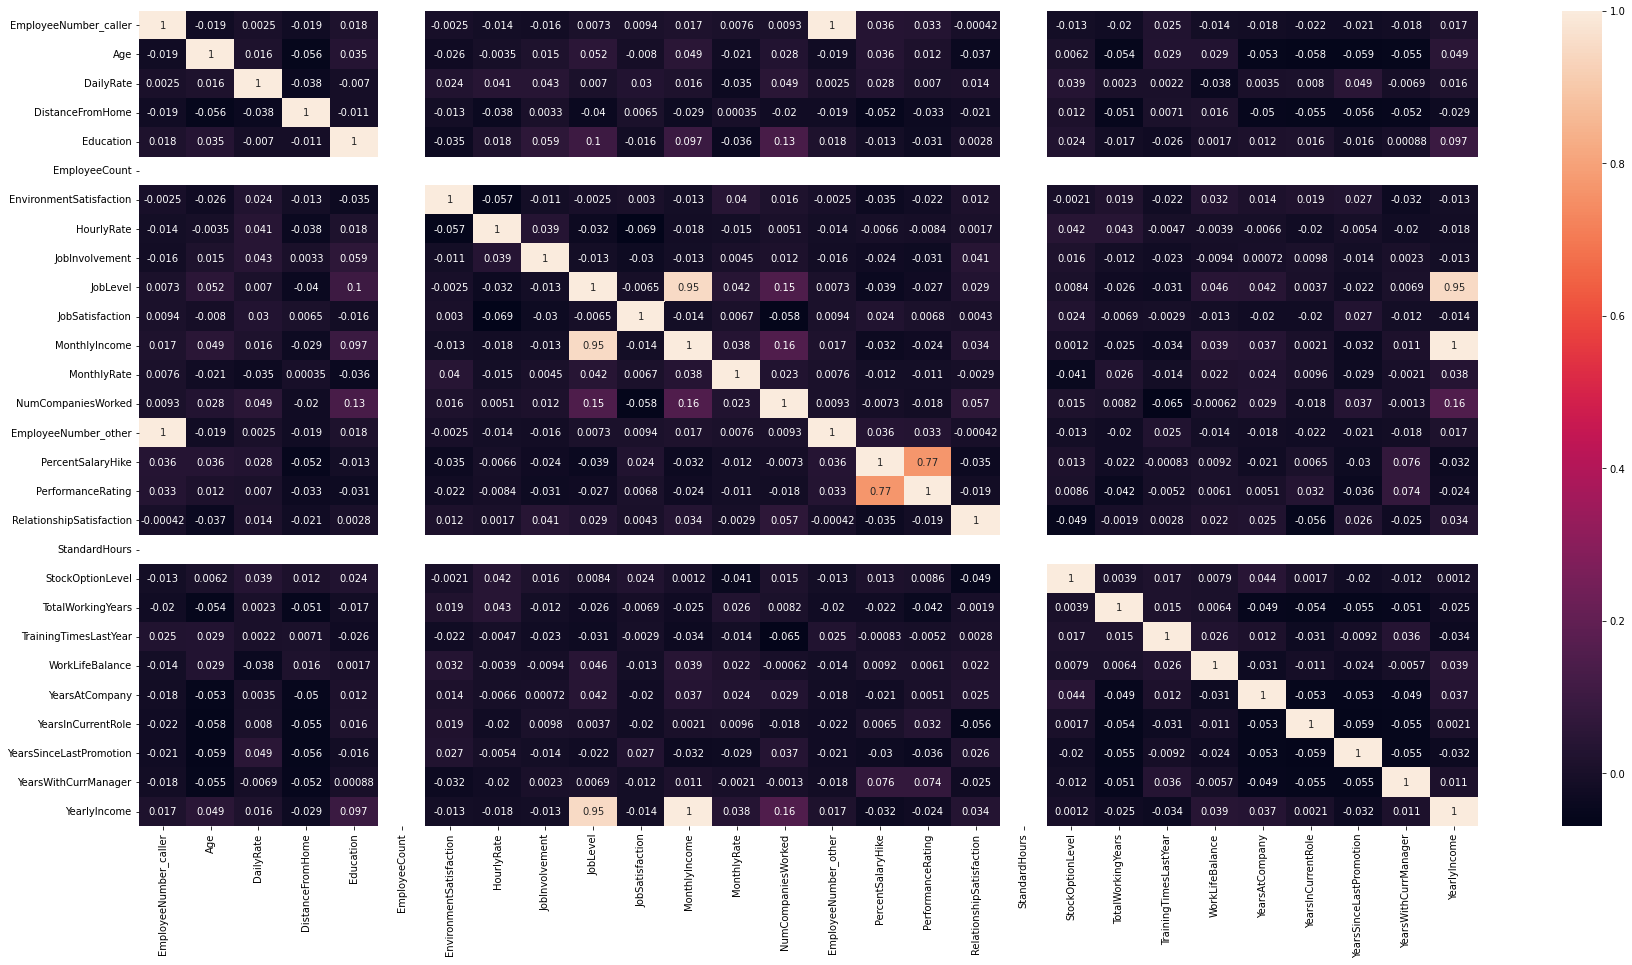

In [ ]:
# Sprawdzenie korelacji pomiędzy kolumnami przez Heat-map

plt.rcParams["figure.figsize"] = [30, 15]
sns.heatmap(ddf3.corr(), annot=True)

In [ ]:
ddf4 = ddf3.drop(['EmployeeCount', 'StandardHours', 'MonthlyIncome', 'JobLevel', 'Over18','PercentSalaryHike'], axis=1)
ddf4

,EmployeeNumber_caller,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,4.0,Male,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,4.0,Female,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,3.0,Female,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,4.0,Female,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,3.0,Male,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,Female,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,Female,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,Male,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,Male,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [ ]:
ddf4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber_caller     4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EnvironmentSatisfaction   4449 non-null   float64
 9   Gender                    4449 non-null   object 
 10  HourlyRate                4449 non-null   float64
 11  JobInvolvement            4449 non-null   float64
 12  JobRole                   4449 non-null   object 
 13  JobSatisfaction           4449 non-null   float64
 14  MaritalS

In [ ]:
def outlier_detection(features_series):

    Q1 = features_series.quantile(0.25)
    Q3 = features_series.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outlier = features_series[
        (features_series > upper_end) | (features_series < lower_end)
    ]
    return outlier

In [ ]:
for column in ddf4.select_dtypes("float64").columns:
    print(f"Outliers w kolumnie {column}")
    outlier = outlier_detection(ddf3[column])
    print(outlier)

Outliers w kolumnie Age
1479    8825.0
1480    8825.0
1499    3628.0
1517    6287.0
1518    6287.0
         ...  
4414    3437.0
4415    3437.0
4443    8823.0
4444    8823.0
4445    8823.0
Name: Age, Length: 298, dtype: float64
Outliers w kolumnie DailyRate
Series([], Name: DailyRate, dtype: float64)
Outliers w kolumnie DistanceFromHome
1478    302984.0
1481    629986.0
1482    629986.0
1483    629986.0
1500    887003.0
          ...   
4354    490741.0
4406    664579.0
4446    918785.0
4447    918785.0
4448    918785.0
Name: DistanceFromHome, Length: 279, dtype: float64
Outliers w kolumnie Education
Series([], Name: Education, dtype: float64)
Outliers w kolumnie EnvironmentSatisfaction
Series([], Name: EnvironmentSatisfaction, dtype: float64)
Outliers w kolumnie HourlyRate
Series([], Name: HourlyRate, dtype: float64)
Outliers w kolumnie JobInvolvement
Series([], Name: JobInvolvement, dtype: float64)
Outliers w kolumnie JobSatisfaction
Series([], Name: JobSatisfaction, dtype: float64)


In [ ]:
#ciekawostka dla Age-> mean vs. median
ddf4.Age.mean()

416.1874578556979

In [ ]:
ddf4.Age.median()

36.0

In [ ]:
ddf4[ddf4.Age>60]

,EmployeeNumber_caller,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
1479,5010,8825.0,Travel_Rarely,1107.0,Human Resources,9.0,4.0,Technical Degree,1.0,Female,...,0.0,2.0,0.0,3.0,2.0,2.0,2.0,2.0,Yes,32904.0
1480,5011,8825.0,Travel_Rarely,1107.0,Human Resources,9.0,4.0,Technical Degree,1.0,Female,...,0.0,2.0,0.0,3.0,2.0,2.0,2.0,2.0,Yes,32904.0
1499,5030,3628.0,Travel_Frequently,544.0,Sales,3.0,2.0,Medical,2.0,Female,...,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,Yes,18828.0
1517,5048,6287.0,Travel_Rarely,1265.0,Research & Development,3.0,3.0,Life Sciences,3.0,Female,...,1.0,17.0,1.0,2.0,5.0,3.0,1.0,3.0,Yes,62772.0
1518,5049,6287.0,Travel_Rarely,1265.0,Research & Development,3.0,3.0,Life Sciences,3.0,Female,...,1.0,17.0,1.0,2.0,5.0,3.0,1.0,3.0,Yes,62772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,7945,3437.0,Travel_Rarely,1299.0,Research & Development,27.0,3.0,Medical,3.0,Male,...,2.0,17.0,3.0,2.0,7.0,7.0,7.0,7.0,Yes,62844.0
4415,7946,3437.0,Travel_Rarely,1299.0,Research & Development,27.0,3.0,Medical,3.0,Male,...,2.0,17.0,3.0,2.0,7.0,7.0,7.0,7.0,Yes,62844.0
4443,7974,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,Female,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,Female,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0


In [ ]:
# ddf4.drop(ddf4[(ddf4.Age > 60) | (ddf4.DistanceFromHome > 29)].index)

Dla kolumn z wartościami "absurdalnymi" (poniżej) dane zostaną podmienione na mediane. Kryterium/wartośc w warunku jest brana "na logikę" / wg. real life 

In [ ]:
# imp_mean = SimpleImputer(missing_values=0, strategy='median')
# c = ['Plasma glucose concentration','Diastolic blood pressure','Triceps skin fold thickness','2-Hour serum insulin','Body mass index','Diabetes pedigree function','Age']
# ddf1 = pd.DataFrame(imp_mean.fit_transform(ddf[c]), columns=c)

In [ ]:
median = ddf4.loc[ddf4['DistanceFromHome']<20000, 'DistanceFromHome'].median()
ddf4.loc[ddf4.DistanceFromHome > 20000, 'DistanceFromHome'] = np.nan
ddf4.fillna(median,inplace=True)

In [ ]:
median = ddf4.loc[ddf4['Age']<60, 'Age'].median()
ddf4.loc[ddf4.Age > 60, 'Age'] = np.nan
ddf4.fillna(median,inplace=True)

In [ ]:
median = ddf4.loc[ddf4['TotalWorkingYears']<55, 'TotalWorkingYears'].median()
ddf4.loc[ddf4.TotalWorkingYears > 60, 'TotalWorkingYears'] = np.nan
ddf4.fillna(median,inplace=True)

In [ ]:
median = ddf4.loc[ddf4['YearsAtCompany']<55, 'YearsAtCompany'].median()
ddf4.loc[ddf4.YearsAtCompany > 60, 'YearsAtCompany'] = np.nan
ddf4.fillna(median,inplace=True)


In [ ]:
median = ddf4.loc[ddf4['YearsInCurrentRole']<55, 'YearsInCurrentRole'].median()
ddf4.loc[ddf4.YearsInCurrentRole > 60, 'YearsInCurrentRole'] = np.nan
ddf4.fillna(median,inplace=True)

In [ ]:
median = ddf4.loc[ddf4['YearsSinceLastPromotion']<55, 'YearsSinceLastPromotion'].median()
ddf4.loc[ddf4.YearsSinceLastPromotion > 60, 'YearsSinceLastPromotion'] = np.nan
ddf4.fillna(median,inplace=True)

In [ ]:
median = ddf4.loc[ddf4['YearsWithCurrManager']<55, 'YearsWithCurrManager'].median()
ddf4.loc[ddf4.YearsWithCurrManager > 60, 'YearsWithCurrManager'] = np.nan
ddf4.fillna(median,inplace=True)

In [ ]:
# Dummy variable

# categorical_columns_ls = ['sex','children', 'smoker', 'region']
categorical_columns_ls = ddf4.select_dtypes(
    ["object"]
).columns.to_list()

ddf4_encoded = pd.get_dummies(
    data=ddf4,
    # prefix = 'OHE',
    prefix_sep="_",
    columns=categorical_columns_ls,
    drop_first=True,
    dtype="int8",
)

In [ ]:
# Lets verify the dummy variable process
print(f"Kolumny w oryginalnej ramce danych: {ddf4.columns.values}")
print(f"Liczba wierszy i kolumn w oryginalnej ramce danych: {ddf4.shape}")
print('')
print(f"Kolumny w ramce danych po transformacji: {ddf4_encoded.columns.values}")
print('')
print(f"Liczba wierszy i kolumn po transformacji: {ddf4_encoded.shape}")

Kolumny w oryginalnej ramce danych: ['EmployeeNumber_caller' 'Age' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EnvironmentSatisfaction'
 'Gender' 'HourlyRate' 'JobInvolvement' 'JobRole' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyRate' 'NumCompaniesWorked' 'EmployeeNumber_other'
 'OverTime' 'PerformanceRating' 'RelationshipSatisfaction'
 'StockOptionLevel' 'TotalWorkingYears' 'TrainingTimesLastYear'
 'WorkLifeBalance' 'YearsAtCompany' 'YearsInCurrentRole'
 'YearsSinceLastPromotion' 'YearsWithCurrManager' 'Attrition'
 'YearlyIncome']
Liczba wierszy i kolumn w oryginalnej ramce danych: (4449, 31)

Kolumny w ramce danych po transformacji: ['EmployeeNumber_caller' 'Age' 'DailyRate' 'DistanceFromHome' 'Education'
 'EnvironmentSatisfaction' 'HourlyRate' 'JobInvolvement' 'JobSatisfaction'
 'MonthlyRate' 'NumCompaniesWorked' 'EmployeeNumber_other'
 'PerformanceRating' 'RelationshipSatisfaction' 'StockOptionLevel'
 'TotalWorkingYears' 'TrainingTime

In [ ]:
from sklearn.model_selection import train_test_split

X = ddf4_encoded.drop('Attrition_Yes', axis=1) # zmienne niezależne (features)
y = ddf4_encoded['Attrition_Yes'] # zmienna zależna (target)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

print("X_train dimension= ", X_train.shape)
print("X_test dimension= ", X_test.shape)
print("y_train dimension= ", y_train.shape)
print("y_train dimension= ", y_test.shape)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

X_train dimension=  (3559, 45)
X_test dimension=  (890, 45)
y_train dimension=  (3559,)
y_train dimension=  (890,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='weighted'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [ ]:
print_results(calculate_metrics(y_test, pred), 'kNN')

Results for kNN
----
  Accuracy:  0.697752808988764
  Precision: 0.6978434381299726
  Recall:    0.697752808988764
  F1 score:  0.6972454200433815
  Mislabeled 269 out of 890




In [ ]:
from sklearn.svm import SVC

# Train a linear SVM
svm = SVC(C = 1.0, kernel="poly")
svm.fit(X_train, y_train)
y_pred_train = svm.predict(X_train)

In [ ]:
parameters = {'C':[0.01, 0.1, 1, 10, 100]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)
print_results(calculate_metrics(y_train, y_pred_train), 'svm')

